# Figure 3

In [1]:
# Load in packages
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




Clear environment: 

In [2]:
rm(list=ls())

Set your datasets below and read in the files containing all indels ≤ 50bp for each dataset:

In [3]:
## define dfs 
df_name_1 = "gnomAD"
df_name_2 = "IGM"

## Read in dataframe (total)
df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv", header = TRUE )

df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv", header = TRUE )

Read in suspicious indels file for each dataset: 

In [4]:
sus_bp_10_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_SuspiciousIndels.lt50bp.csv", header = TRUE)
sus_bp_20_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_SuspiciousIndels.lt50bp.csv", header = TRUE)
sus_bp_30_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_SuspiciousIndels.lt50bp.csv", header = TRUE)
sus_bp_40_df_1 = fread("gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_SuspiciousIndels.lt50bp.csv", header = TRUE)

In [5]:
sus_bp_10_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp10_SuspiciousIndels.lt50bp.csv", header = TRUE)
sus_bp_20_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp20_SuspiciousIndels.lt50bp.csv", header = TRUE)
sus_bp_30_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp30_SuspiciousIndels.lt50bp.csv", header = TRUE)
sus_bp_40_df_2 = fread("2023-03-23_IGM_n39367_indelsonly_rAF_bp40_SuspiciousIndels.lt50bp.csv", header = TRUE)

Declare your bp range:

In [6]:
bp_range = c("10", "20", "30", "40")

Define your rareness threshold:

In [7]:
rare = (1 * 10^-4)

Find the total number of indels that are rare by sAF 

In [8]:
tot_rare_sAF_df1 = nrow(df_1 %>% filter(sAF <= rare))
tot_rare_sAF_df2 = nrow(df_2 %>% filter(sAF <= rare))

Calculate the number and percentages of the rare sAF indels that are also rare by rAF for each bp window and also calculate the number and percentages of the rare sAF indels that are suspicious (common by rAF for each bp window) 

In [9]:
for (i in bp_range) {
  # call that var
  temp_df_1 = paste0("sus_bp_", i, "_df_1")
  temp_df_2 = paste0("sus_bp_", i, "_df_2")
  
  ## calculate the number of sus indels 
  num_df_1 = paste0("num_sus_bp_", i , "_df_1")
  assign(num_df_1, nrow(get(temp_df_1)))
  
  num_df_2 = paste0("num_sus_bp_", i , "_df_2")
  assign(num_df_2, nrow(get(temp_df_2)))
  
  # get the number of rare indels 
  rare_df_1 = paste0("num_rare_bp_", i , "_df_1")
  assign(rare_df_1, (tot_rare_sAF_df1 - nrow(get(temp_df_1))))
  
  rare_df_2 = paste0("num_rare_bp_", i , "_df_2")
  assign(rare_df_2, (tot_rare_sAF_df2 - nrow(get(temp_df_2))))
  
  
  ## calculate the percentage and save in dynamic variable 
  percent_df_1 = paste0("percent_sus_bp_", i, "_df_1")
  assign(percent_df_1, paste0(round(((get(num_df_1) / tot_rare_sAF_df1) * 100 ),0), "%")) 
  
  percent_df_2 = paste0("percent_sus_bp_", i, "_df_2")
  assign(percent_df_2, paste0(round(((get(num_df_2) / tot_rare_sAF_df2) * 100 ),0), "%"))
  
  ## find the percentage of the rare sAF/rare rAF genes 
  percent_diff_df_1 = paste0("percent_rare_bp_", i, "_df_1")
  assign(percent_diff_df_1, paste0(round(((get(rare_df_1) / tot_rare_sAF_df1) * 100 ),0), "%")) 
  
  percent_diff_df_2 = paste0("percent_rare_bp_", i, "_df_2")
  assign(percent_diff_df_2, paste0(round(((get(rare_df_2) / tot_rare_sAF_df2) * 100 ),0), "%")) 
}


Make dataframe for graph 

In [10]:
windows = c(rep(bp_range, 4))
condition = c(rep("sus", 4), rep("rare", 4), rep("sus", 4), rep("rare", 4))

num_indels = c(num_sus_bp_10_df_1, num_sus_bp_20_df_1, num_sus_bp_30_df_1, num_sus_bp_40_df_1, num_rare_bp_10_df_1, num_rare_bp_20_df_1, num_rare_bp_30_df_1, num_rare_bp_40_df_1, num_sus_bp_10_df_2, num_sus_bp_20_df_2, num_sus_bp_30_df_2, num_sus_bp_40_df_2, num_rare_bp_10_df_2, num_rare_bp_20_df_2, num_rare_bp_30_df_2, num_rare_bp_40_df_2)

perct_indels = c(percent_sus_bp_10_df_1,percent_sus_bp_20_df_1, percent_sus_bp_30_df_1, percent_sus_bp_40_df_1, percent_rare_bp_10_df_1, percent_rare_bp_20_df_1, percent_rare_bp_30_df_1, percent_rare_bp_40_df_1,percent_sus_bp_10_df_2,percent_sus_bp_20_df_2, percent_sus_bp_30_df_2, percent_sus_bp_40_df_2, percent_rare_bp_10_df_2, percent_rare_bp_20_df_2, percent_rare_bp_30_df_2, percent_rare_bp_40_df_2 )

df_labels = c(rep(df_name_1, 8), rep(df_name_2, 8))

graph_df = data.frame(windows, condition, num_indels, perct_indels, df_labels)

Make graph 

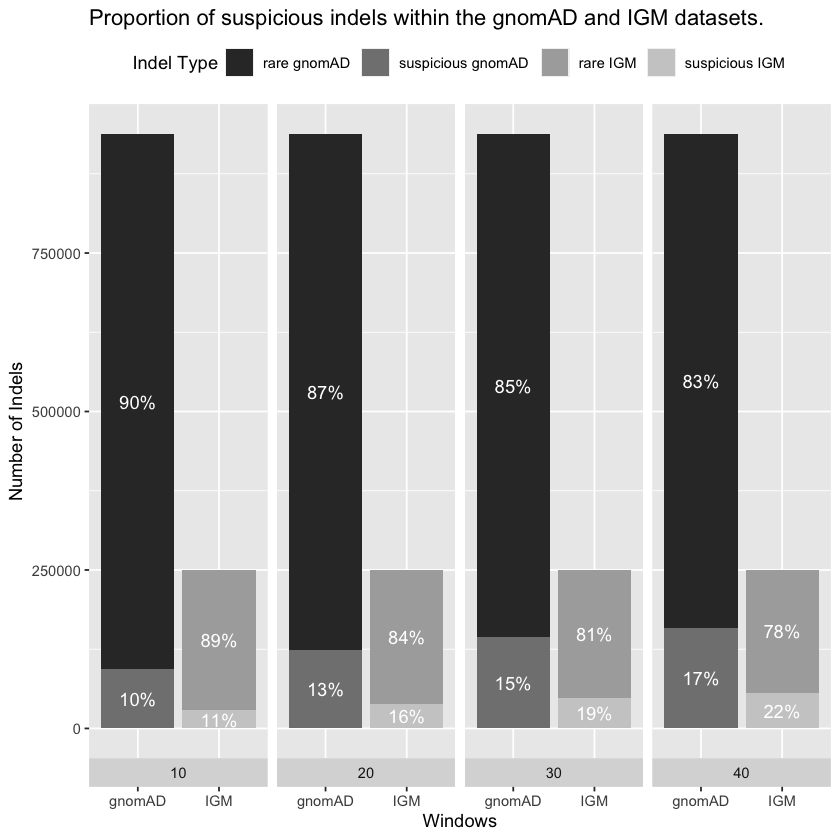

In [11]:
ggplot(graph_df, aes(x = df_labels, y = num_indels, fill = interaction(condition, df_labels))) + geom_bar(stat = "identity", position = "stack") + facet_grid(~windows, switch = "both")  +  theme(legend.position = "top") + labs(title = "Proportion of suspicious indels within the gnomAD and IGM datasets.", y = "Number of Indels", x = "Windows", fill = "Indel Type") +  geom_text(aes(label = perct_indels), color = "white", position = position_stack(vjust = 0.5)) + scale_fill_grey(labels = c(paste0("rare ", df_name_1), paste0 ("suspicious ", df_name_1), paste0("rare ", df_name_2), paste0 ("suspicious ", df_name_2))) 

Find out how many suspicious indels. 

In [12]:
for (i in bp_range) {
  num_df1 = paste0("num_sus_bp_", i , "_df_1")
  num_df2 = paste0("num_sus_bp_", i , "_df_2")
  
  prct_df1 = paste0("percent_sus_bp_", i, "_df_1")
  prct_df2 = paste0("percent_sus_bp_", i, "_df_2")
  
  print (paste0("In the dataframe ", df_name_1, " there are ", get(num_df1), " suspicious indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_1, " suspicious indels account for ", get(prct_df1), " percent in the ",i,"bp sliding window."))
  
  
  print (paste0("In the dataframe ", df_name_2, " there are ", get(num_df2), " suspicious indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_2, " suspicious indels account for ", get(prct_df2), " percent in the ",i,"bp sliding window."))
}

[1] "In the dataframe gnomAD there are 93715 suspicious indels in the 10bp sliding window."
[1] "In the dataframe gnomAD suspicious indels account for 10% percent in the 10bp sliding window."
[1] "In the dataframe IGM there are 28436 suspicious indels in the 10bp sliding window."
[1] "In the dataframe IGM suspicious indels account for 11% percent in the 10bp sliding window."
[1] "In the dataframe gnomAD there are 123821 suspicious indels in the 20bp sliding window."
[1] "In the dataframe gnomAD suspicious indels account for 13% percent in the 20bp sliding window."
[1] "In the dataframe IGM there are 39329 suspicious indels in the 20bp sliding window."
[1] "In the dataframe IGM suspicious indels account for 16% percent in the 20bp sliding window."
[1] "In the dataframe gnomAD there are 143677 suspicious indels in the 30bp sliding window."
[1] "In the dataframe gnomAD suspicious indels account for 15% percent in the 30bp sliding window."
[1] "In the dataframe IGM there are 48224 suspicio

In [13]:
graph_df

windows,condition,num_indels,perct_indels,df_labels
<chr>,<chr>,<int>,<chr>,<chr>
10,sus,93715,10%,gnomAD
20,sus,123821,13%,gnomAD
30,sus,143677,15%,gnomAD
40,sus,158197,17%,gnomAD
10,rare,844310,90%,gnomAD
20,rare,814204,87%,gnomAD
30,rare,794348,85%,gnomAD
40,rare,779828,83%,gnomAD
10,sus,28436,11%,IGM


# Make Supplementary Tables S5 and S6. 

In [14]:
rare_df1 = c(rep(tot_rare_sAF_df1,4))
sus_df1 = c(num_sus_bp_10_df_1, num_sus_bp_20_df_1, num_sus_bp_30_df_1, num_sus_bp_40_df_1)
sus_prct_df1 = c(percent_sus_bp_10_df_1, percent_sus_bp_20_df_1, percent_sus_bp_30_df_1, percent_sus_bp_40_df_1)
rare_raf_df1 = c(num_rare_bp_10_df_1, num_rare_bp_20_df_1, num_rare_bp_30_df_1, num_rare_bp_40_df_1)
rare_raf_prct_df1 = c(percent_rare_bp_10_df_1, percent_rare_bp_20_df_1, percent_rare_bp_30_df_1, percent_rare_bp_40_df_1)

TableS5 = data.frame(bp_range, rare_df1, sus_df1, sus_prct_df1, rare_raf_df1, rare_raf_prct_df1)
TableS5

rare_df2 = c(rep(tot_rare_sAF_df2,4))
sus_df2 = c(num_sus_bp_10_df_2, num_sus_bp_20_df_2, num_sus_bp_30_df_2, num_sus_bp_40_df_2)
sus_prct_df2 = c(percent_sus_bp_10_df_2, percent_sus_bp_20_df_2, percent_sus_bp_30_df_2, percent_sus_bp_40_df_2)
rare_raf_df2 = c(num_rare_bp_10_df_2, num_rare_bp_20_df_2, num_rare_bp_30_df_2, num_rare_bp_40_df_2)
rare_raf_prct_df2 = c(percent_rare_bp_10_df_2, percent_rare_bp_20_df_2, percent_rare_bp_30_df_2, percent_rare_bp_40_df_2)

TableS6 = data.frame(bp_range, rare_df2, sus_df2, sus_prct_df2, rare_raf_df2, rare_raf_prct_df2)
TableS6

bp_range,rare_df1,sus_df1,sus_prct_df1,rare_raf_df1,rare_raf_prct_df1
<chr>,<int>,<int>,<chr>,<int>,<chr>
10,938025,93715,10%,844310,90%
20,938025,123821,13%,814204,87%
30,938025,143677,15%,794348,85%
40,938025,158197,17%,779828,83%


bp_range,rare_df2,sus_df2,sus_prct_df2,rare_raf_df2,rare_raf_prct_df2
<chr>,<int>,<int>,<chr>,<int>,<chr>
10,250269,28436,11%,221833,89%
20,250269,39329,16%,210940,84%
30,250269,48224,19%,202045,81%
40,250269,55962,22%,194307,78%
